In [1]:
##Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib as mpl
from pywaffle import Waffle
from highlight_text import fig_text

In [2]:
#Import the dataset
df = pd.read_csv('touches.csv')

In [3]:
df

,Player,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen
0,Lionel Messi\Lionel-Messi,79,0,3,50,35,6
1,Ansu Fati\Ansu-Fati,38,0,4,17,23,5
2,Pedri\Pedri,15,1,2,8,8,0
3,Antoine Griezmann\Antoine-Griezmann,19,0,4,6,9,2
4,Francisco Trinc�o\Francisco-Trincao,24,0,2,14,10,4
5,Philippe Coutinho\Philippe-Coutinho,46,1,3,31,15,1
6,Miralem Pjani?\Miralem-Pjanic,20,0,8,7,7,0
7,Frenkie de Jong\Frenkie-de-Jong,64,2,12,37,16,2
8,Sergio Busquets\Sergio-Busquets,91,1,16,55,21,2
9,Jordi Alba\Jordi-Alba,59,2,23,27,16,0


In [4]:
#editing the player names by splitting
df['Player'] = df['Player'].str.split('\\',expand = True)[0]
df

,Player,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen
0,Lionel Messi,79,0,3,50,35,6
1,Ansu Fati,38,0,4,17,23,5
2,Pedri,15,1,2,8,8,0
3,Antoine Griezmann,19,0,4,6,9,2
4,Francisco Trinc�o,24,0,2,14,10,4
5,Philippe Coutinho,46,1,3,31,15,1
6,Miralem Pjani?,20,0,8,7,7,0
7,Frenkie de Jong,64,2,12,37,16,2
8,Sergio Busquets,91,1,16,55,21,2
9,Jordi Alba,59,2,23,27,16,0


In [5]:
#sorting the data 
df = df.sort_values(by = ['Touches'], ascending = False)
df = df.drop(15)
df =  df.drop('Touches', axis = 1)


In [6]:
df

,Player,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen
13,Sergi Roberto,3,33,39,24,3
8,Sergio Busquets,1,16,55,21,2
0,Lionel Messi,0,3,50,35,6
11,Gerard Piqu�,16,45,40,0,0
12,Ronald Ara�jo,12,34,36,0,0
7,Frenkie de Jong,2,12,37,16,2
9,Jordi Alba,2,23,27,16,0
14,Neto,43,48,0,0,0
5,Philippe Coutinho,1,3,31,15,1
1,Ansu Fati,0,4,17,23,5


In [7]:
#transposing the data left to right
df = df.T
df.columns = df.iloc[0]
df = df.drop('Player')
df

Player,Sergi Roberto,Sergio Busquets,Lionel Messi,Gerard Piqu�,Ronald Ara�jo,Frenkie de Jong,Jordi Alba,Neto,Philippe Coutinho,Ansu Fati,Francisco Trinc�o,Miralem Pjani?,Antoine Griezmann,Sergi�o Dest,Pedri
Def Pen,3,1,0,16,12,2,2,43,1,0,0,0,0,0,1
Def 3rd,33,16,3,45,34,12,23,48,3,4,2,8,4,6,2
Mid 3rd,39,55,50,40,36,37,27,0,31,17,14,7,6,5,8
Att 3rd,24,21,35,0,0,16,16,0,15,23,10,7,9,5,8
Att Pen,3,2,6,0,0,2,0,0,1,5,4,0,2,1,0


In [8]:
#new list with the dataframe
my_list = df.columns.values.tolist()
df = pd.DataFrame(df,columns = my_list)

In [9]:
my_list

['Sergi Roberto',
 'Sergio Busquets',
 'Lionel Messi',
 'Gerard Piqu�',
 'Ronald Ara�jo',
 'Frenkie de Jong',
 'Jordi Alba',
 'Neto',
 'Philippe Coutinho',
 'Ansu Fati',
 'Francisco Trinc�o',
 'Miralem Pjani?',
 'Antoine Griezmann',
 'Sergi�o Dest',
 'Pedri']

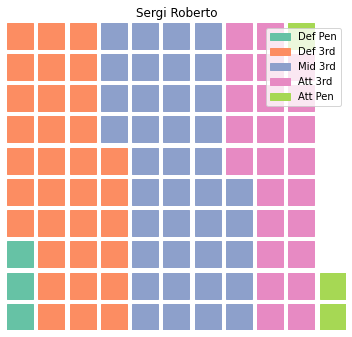

In [10]:
#creating a waffleplot for a single player
fig = plt.figure(
        FigureClass = Waffle,
        values = df.iloc[:,0],
        labels = list(df.index),
        rows = 10,
        title = {'label':my_list[0]},
        figsize = (5,5),
        #colors = ['green','blue','red','yellow','pink']
        )

C:\Users\Arnav\Anaconda3\lib\site-packages\pywaffle\waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


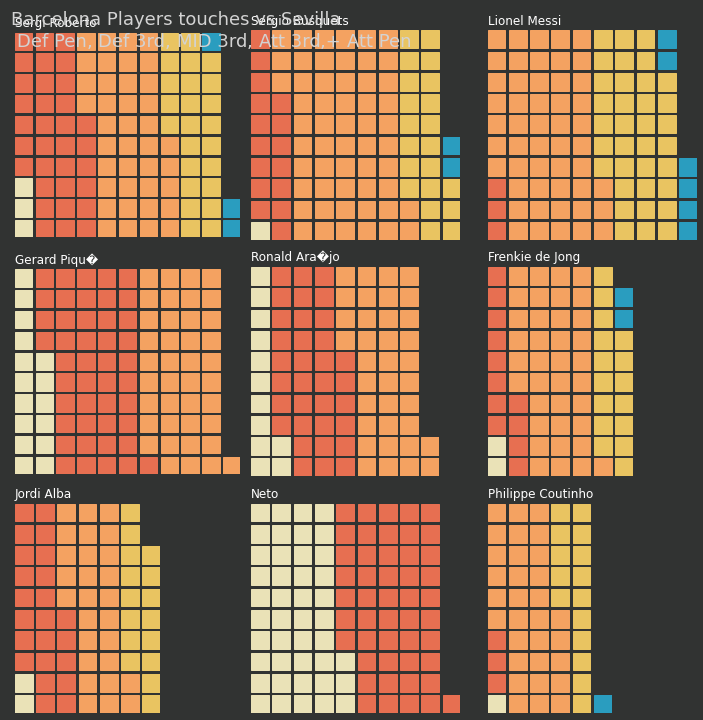

In [11]:
#creating a subplot
fig = plt.figure(
        FigureClass = Waffle,
        rows = 10,
        figsize = (10,10),
        plots = {
                '331': { #3*3 matrix with first plot
                        'values' : df.iloc[:,0],
                        'title': {
                                'label':my_list[0],
                                'color' : 'white',
                                'loc':  'left'
                                }
                        },
                  '332': { #3*3 matrix with first plot
                        'values' : df.iloc[:,1],
                        'title': {
                                'label':my_list[1],
                                'color' : 'white',
                                'loc':  'left'
                                }
                        },
                        '333': { #3*3 matrix with first plot
                        'values' : df.iloc[:,2],
                        'title': {
                                'label':my_list[2],
                                'color' : 'white',
                                'loc':  'left'
                                }
                        },
                        '334': { #3*3 matrix with first plot
                        'values' : df.iloc[:,3],
                        'title': {
                                'label':my_list[3],
                                'color' : 'white',
                                'loc':  'left'
                                }
                        },
                        '335': { #3*3 matrix with first plot
                        'values' : df.iloc[:,4],
                        'title': {
                                'label':my_list[4],
                                'color' : 'white',
                                'loc':  'left'
                                }
                        },
                        '336': { #3*3 matrix with first plot
                        'values' : df.iloc[:,5],
                        'title': {
                                'label':my_list[5],
                                'color' : 'white',
                                'loc':  'left'
                                }
                        },
                        '337': { #3*3 matrix with first plot
                        'values' : df.iloc[:,6],
                        'title': {
                                'label':my_list[6],
                                'color' : 'white',
                                'loc':  'left'
                                }
                        },
                        '338': { #3*3 matrix with first plot
                        'values' : df.iloc[:,7],
                        'title': {
                                'label':my_list[7],
                                'color' : 'white',
                                'loc':  'left'
                                }
                        },'339': { #3*3 matrix with first plot
                        'values' : df.iloc[:,8],
                        'title': {
                                'label':my_list[8],
                                'color' : 'white',
                                'loc':  'left'
                                }
                        },
                },
                       colors=('#eae2b7','#e76f51','#f4a261','#e9c461','#2a9dBf')
        )
             
                
#putting a box with hightlight text library 
fig_text(s = 'Barcelona Players touches vs Sevilla \n <Def Pen>, <Def 3rd>, <MID 3rd>, <Att 3rd>,+ <Att Pen>',
        x = 0.01, y = 0.99,
        fontsize = 18,
        color = 'lightgrey',
        #highlight_colors = ['#eae2b7','#e76f51','#f4a261','#e9c461','#2a9dBf']
        )                          

fig.patch.set_facecolor('#313332')